[Reference](https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630)

In [1]:
!pip install descartes
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 7.1MB/s 
     |████████████████████████████████| 14.8MB 248kB/s 


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd

Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [18]:
fp = "IDN_adm1.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,106,IDN,Indonesia,1,Aceh,Propinsi,Autonomous Province,None,Achin|Atjeh|Nanggroe Aceh Darussalam,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9..."
1,106,IDN,Indonesia,2,Bali,Propinsi,Province,None,Penida|Lembongan|Ceningan|Menjangan,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ..."
2,106,IDN,Indonesia,3,Bangka-Belitung,Propinsi,Province,None,Babel|Kepulauan Bangka Belitung,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ..."
3,106,IDN,Indonesia,4,Banten,Propinsi,Province,None,None,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ..."
4,106,IDN,Indonesia,5,Bengkulu,Propinsi,Province,None,Bencoolen|Benkoelen|Benkulen,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ..."


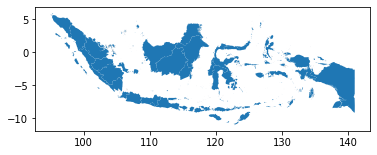

In [12]:
map_df.plot()

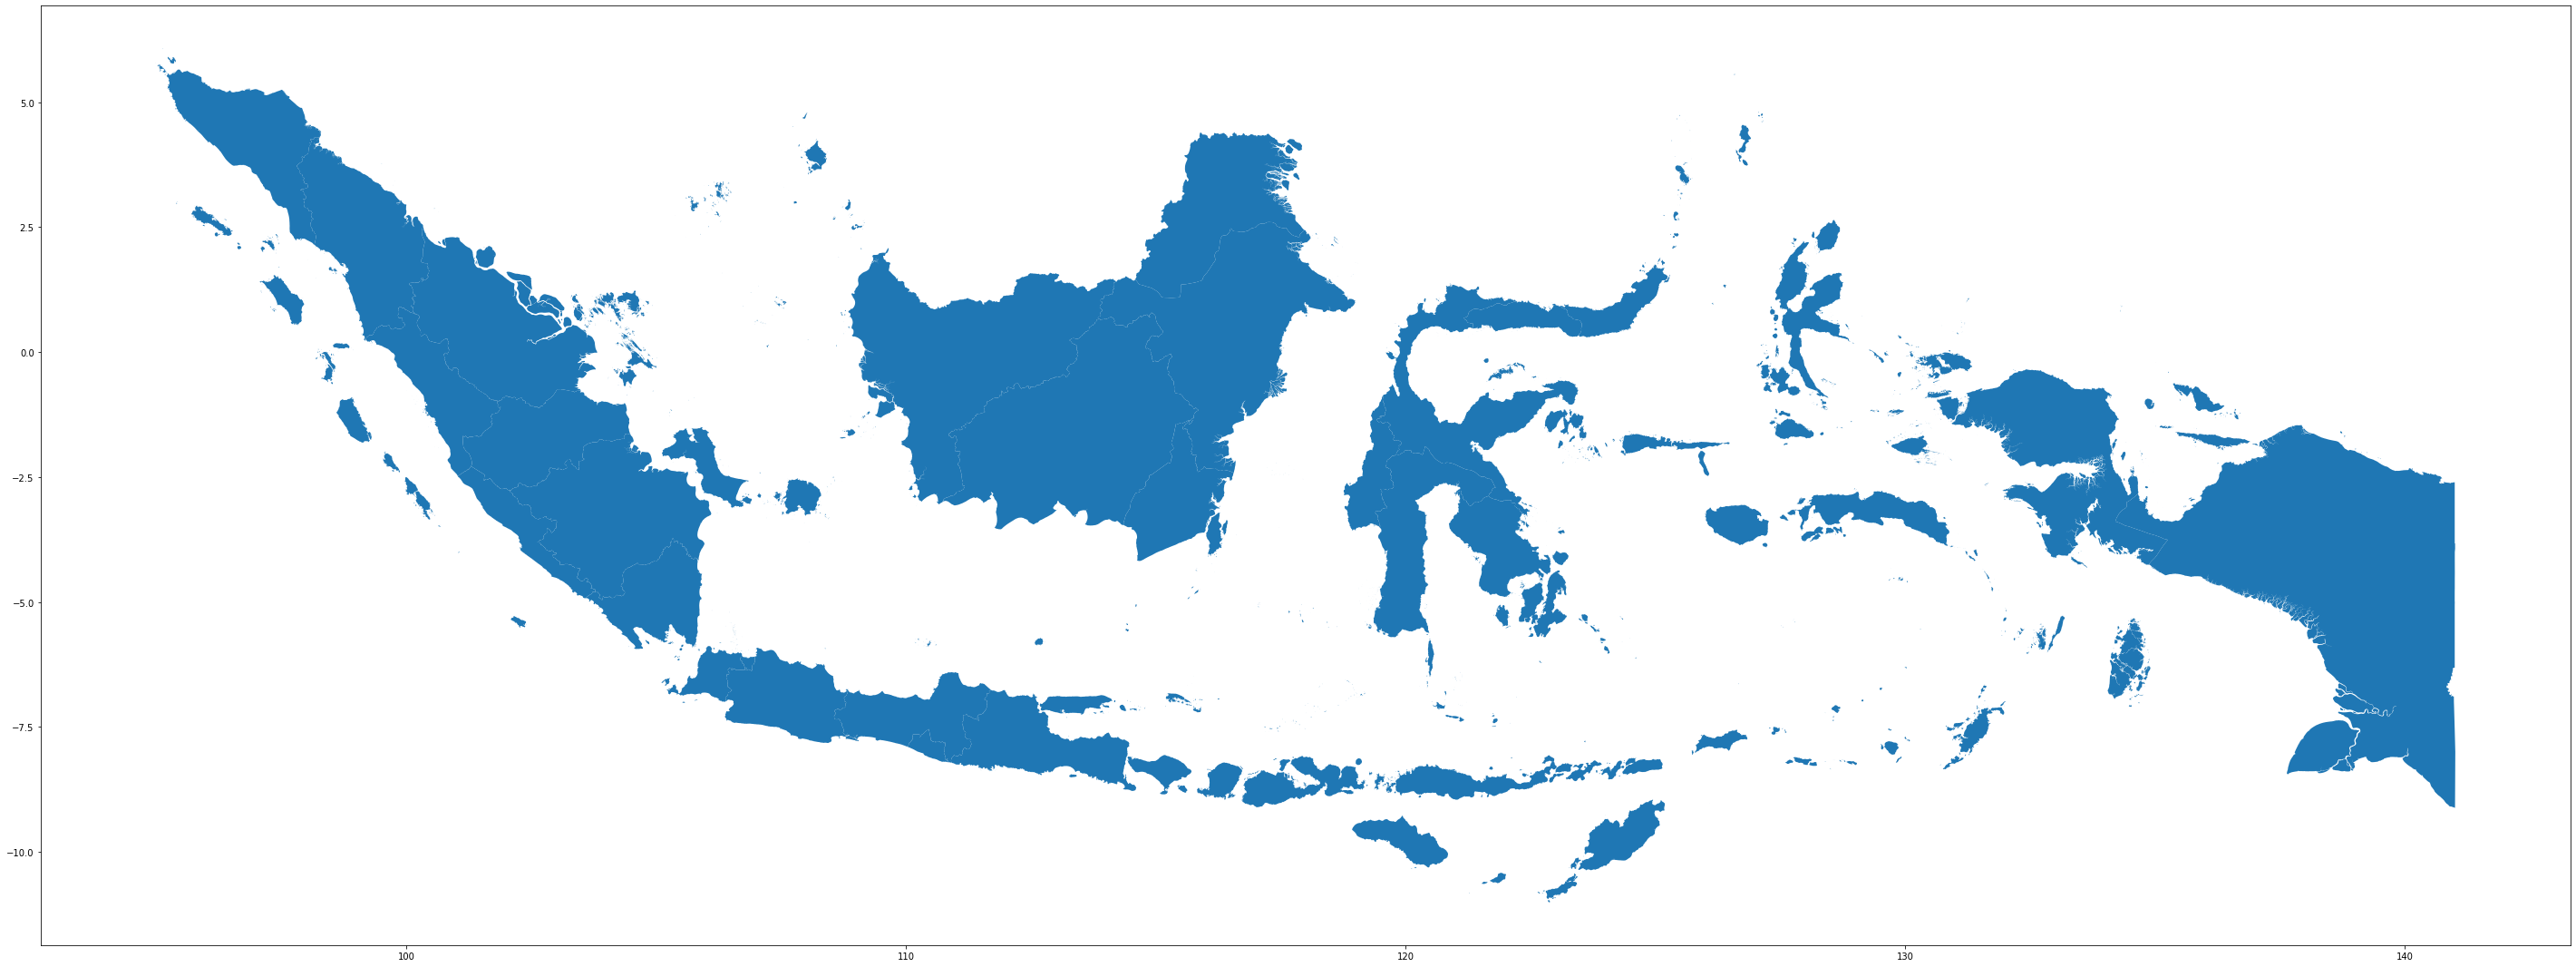

In [13]:
plt.rcParams['figure.figsize'] = [50, 70] #height, width
map_df.plot()

In [15]:
province = pd.read_csv("https://raw.githubusercontent.com/mrakelinggar/data-stuffs/master/cloropleth_python/data_province.csv", sep=";")
province.head()

,province,population_2015,area_km2,population_density_per_km2,cities_regencies,cities,regencies
0,Jawa Timur,38828061,48,828,38,9,29
1,Jawa Tengah,33753023,41,894,35,6,29
2,Sumatera Utara,13923262,73,188,33,8,25
3,Papua,3143088,319,8,29,1,28
4,Jawa Barat,46668214,35,1,27,9,18


In [19]:
# join the geodataframe with the csv dataframe
merged = map_df.merge(province, how='left', left_on="NAME_1", right_on="province")
merged = merged[['province', 'geometry', 'population_2015', 'area_km2', 'population_density_per_km2', \
                'cities_regencies', 'cities', 'regencies']]
merged.head()

,province,geometry,population_2015,area_km2,population_density_per_km2,cities_regencies,cities,regencies
0,Aceh,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9...",4993385.0,58.0,77.0,23.0,5,18.0
1,Bali,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ...",4148588.0,6.0,621.0,9.0,1,8.0
2,Bangka-Belitung,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ...",1370331.0,16.0,64.0,7.0,1,6.0
3,Banten,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ...",11934373.0,10.0,909.0,8.0,4,4.0
4,Bengkulu,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ...",1872136.0,20.0,84.0,10.0,1,9.0


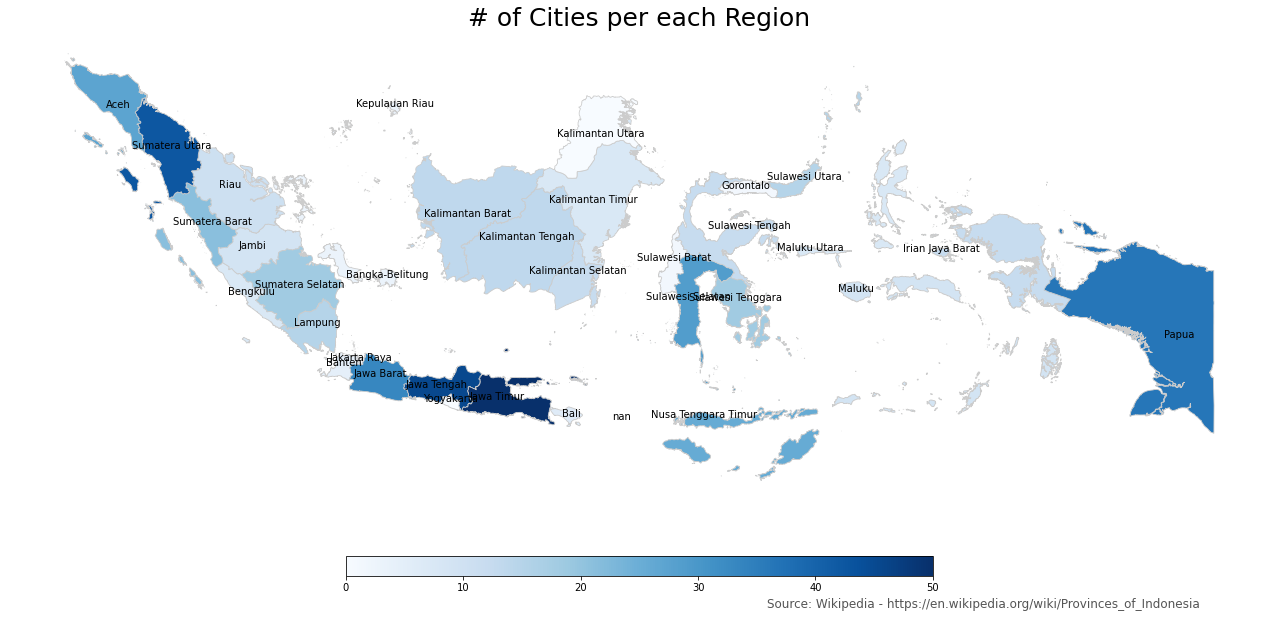

In [28]:
# set the value column that will be visualised
variable = 'cities_regencies'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('# of Cities per each Region', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) 

# or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
# fig.colorbar(sm)
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    plt.annotate(s=row['province'], xy=row['coords'],horizontalalignment='center')

In [26]:
# fig.savefig(‘map.png’, dpi=300)